<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Inteligência Artificial</b></font></h1> 
<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1> 

# Modelos Sequenciais e Classificação com TensorFlow
Professor(a): Rogério de Oliveira

<br>
<br>

---


# Introdução

Nesta trilha vamos estudar os modelos sequenciais de deep learning para classificação. Os modelos sequenciais são redes em camadas, semelhante ao que vimos antes (redes feedforwad e o Modelo Multilayer Perceptron), que agora vamos implementar empregando o TensorFlow. 

O leitor deve ter em mente que comparar TensorFlow e Keras não é a melhor maneira de abordar a questão, já que Keras funciona como um wrapper para a estrutura do TensorFlow. Portanto, você pode definir um modelo com a interface de Keras, que é mais fácil de usar, e ir para o TensorFlow quando precisar usar um recurso que Keras não tem ou quando estiver procurando uma funcionalidade específica do TensorFlow. Assim, você pode colocar seu código TensorFlow diretamente no pipeline ou modelo de treinamento Keras.

O TensorFlow é uma plataforma de código-fonte aberto de ponta a ponta, uma biblioteca para várias tarefas de aprendizado de máquina, enquanto o Keras é uma biblioteca de rede neural de alto nível executada no TensorFlow. Ambos fornecem APIs de alto nível usadas para construir e treinar modelos facilmente, mas Keras é mais amigável porque é Python integrado.

Existem três maneiras de criar modelos Keras:

O modelo sequencial , que é muito direto (uma lista simples de camadas), mas é limitado a pilhas de camadas de entrada única e saída única (como o nome indica).

A API Funcional , que é uma API fácil de usar e com todos os recursos que oferece suporte a arquiteturas de modelo arbitrárias. Para a maioria das pessoas e dos casos de uso, é isso que você deve usar. Este é o modelo da "força da indústria" de Keras.

Subclasse de modelo , onde você implementa tudo do zero por conta própria. Use-o se você tiver casos de uso de pesquisa complexos e prontos para uso.

|   |	Keras	| Pytorch	| TensorFlow |
|---|-------|---------|------------|
| API Level |	High	|Low	|High and Low|
| Architecture	|Simple, concise, readable|	Complex, less readable	|Not easy to use |
| Datasets	|Smaller datasets	|Large datasets, high performance|	Large datasets, high performance |
| Debugging	|Simple network, so debugging is not often needed|	Good debugging capabilities	|Difficult to conduct debugging|
| Does It Have Trained Models?	|Yes	|Yes|	Yes|
| Popularity	|Most popular	|Third most popular	|Second most popular|
| Speed	|Slow, low performance|	Fast, high-performance	|Fast, high-performance| 
| Written In	|Python	|Lua	|C++, CUDA, Python|

In [37]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/MASS/biopsy.csv', index_col=0)
display(df.head())

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
1,1000025,5,1,1,1,2,1.0,3,1,1,benign
2,1002945,5,4,4,5,7,10.0,3,2,1,benign
3,1015425,3,1,1,1,2,2.0,3,1,1,benign
4,1016277,6,8,8,1,3,4.0,3,7,1,benign
5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [38]:
df['class'].value_counts()

benign       458
malignant    241
Name: class, dtype: int64

In [39]:
df = df.drop(columns='ID')
print( df.isna().sum(), '\n', 'total NA =' , df.isna().sum().sum() )
df.V6 = df.V6.fillna( df.V6.mean() )
print( '\n', 'total NA =' , df.isna().sum().sum() )

V1        0
V2        0
V3        0
V4        0
V5        0
V6       16
V7        0
V8        0
V9        0
class     0
dtype: int64 
 total NA = 16

 total NA = 0


In [40]:
df['class'] = df['class'].map({'benign': 0, 'malignant': 1})

X = df.drop('class', axis=1)
y = df[['class']]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [6]:
display(X_train.head())
display(y_train.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9
35,3,1,2,1,2,1.0,2,1,1
34,2,1,1,2,2,1.0,3,1,1
286,8,10,10,10,8,10.0,10,7,3
454,4,5,5,8,6,10.0,10,7,1
296,5,5,7,8,6,10.0,7,4,1


,class
35,0
34,0
286,1
454,1
296,1


In [42]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

model = keras.Sequential([
    layers.Dense(8, activation='sigmoid', input_shape=[9]),
    layers.Dense(1, activation='sigmoid'),
])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [45]:
from numpy.random import seed
seed(123)
tf.random.set_seed(123)

history = model.fit(
    X_train, y_train,
    batch_size=1,
    validation_split=0.3,
    epochs=20,
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/20
342/342 [==============================] - 1s 2ms/step - loss: 0.6517 - binary_accuracy: 0.6637 - val_loss: 0.6296 - val_binary_accuracy: 0.6327
Epoch 2/20
342/342 [==============================] - 1s 1ms/step - loss: 0.5774 - binary_accuracy: 0.6813 - val_loss: 0.5947 - val_binary_accuracy: 0.6259
Epoch 3/20
342/342 [==============================] - 0s 1ms/step - loss: 0.5395 - binary_accuracy: 0.6871 - val_loss: 0.5573 - val_binary_accuracy: 0.6259
Epoch 4/20
342/342 [==============================] - 0s 1ms/step - loss: 0.5100 - binary_accuracy: 0.6901 - val_loss: 0.5242 - val_binary_accuracy: 0.6259
Epoch 5/20
342/342 [==============================] - 0s 1ms/step - loss: 0.4753 - binary_accuracy: 0.7573 - val_loss: 0.4717 - val_binary_accuracy: 0.8163
Epoch 6/20
342/342 [==============================] - 1s 1ms/step - loss: 0.4291 - binary_accuracy: 0.8480 - val_loss: 0.4243 - val_binary_accuracy: 0.8639
Epoch 7/20
342/342 [==============================] - 0s 1ms/ste

In [46]:
def display_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

  print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))
  return

  

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.651726,0.663743,0.629628,0.632653
1,0.577407,0.681287,0.594671,0.625850
2,0.539457,0.687135,0.557316,0.625850
3,0.509954,0.690058,0.524173,0.625850
4,0.475315,0.757310,0.471664,0.816327


Best Validation Loss: 0.2021
Best Validation Accuracy: 0.9388


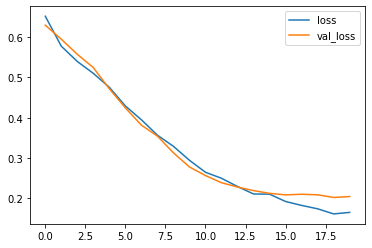

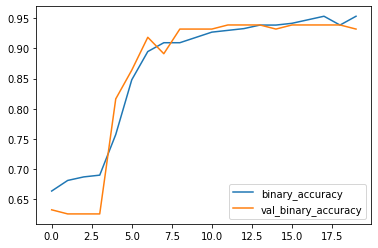

In [47]:
display_hist(history)  

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ' , accuracy_score(y_test, y_pred))
  return

In [53]:
y_pred = model.predict(X_test) > 0.5

print_results(y_test, y_pred)


Matriz de Confusão: 
 [[127   4]
 [  6  73]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       131
           1       0.95      0.92      0.94        79

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

Acuracidade:  0.9523809523809523


# Functional API 1


In [61]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
# This returns a tensor
inputs = Input(shape=(9,))
# A layer instance is callable on a tensor, and returns a tensor
x = Dense(8, activation='sigmoid')(inputs)
outputs = Dense(1, activation='sigmoid')(x)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


In [63]:
history = model.fit(
    X_train, y_train,
    batch_size=1,
    validation_split=0.3,
    epochs=20,
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/20
342/342 [==============================] - 1s 2ms/step - loss: 0.6517 - binary_accuracy: 0.6637 - val_loss: 0.6296 - val_binary_accuracy: 0.6327
Epoch 2/20
342/342 [==============================] - 1s 1ms/step - loss: 0.5774 - binary_accuracy: 0.6813 - val_loss: 0.5947 - val_binary_accuracy: 0.6259
Epoch 3/20
342/342 [==============================] - 0s 1ms/step - loss: 0.5395 - binary_accuracy: 0.6871 - val_loss: 0.5573 - val_binary_accuracy: 0.6259
Epoch 4/20
342/342 [==============================] - 0s 1ms/step - loss: 0.5100 - binary_accuracy: 0.6901 - val_loss: 0.5242 - val_binary_accuracy: 0.6259
Epoch 5/20
342/342 [==============================] - 0s 1ms/step - loss: 0.4753 - binary_accuracy: 0.7573 - val_loss: 0.4717 - val_binary_accuracy: 0.8163
Epoch 6/20
342/342 [==============================] - 0s 1ms/step - loss: 0.4291 - binary_accuracy: 0.8480 - val_loss: 0.4243 - val_binary_accuracy: 0.8639
Epoch 7/20
342/342 [==============================] - 0s 1ms/ste

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.651726,0.663743,0.629628,0.632653
1,0.577407,0.681287,0.594671,0.625850
2,0.539457,0.687135,0.557316,0.625850
3,0.509954,0.690058,0.524173,0.625850
4,0.475315,0.757310,0.471664,0.816327


Best Validation Loss: 0.2021
Best Validation Accuracy: 0.9388


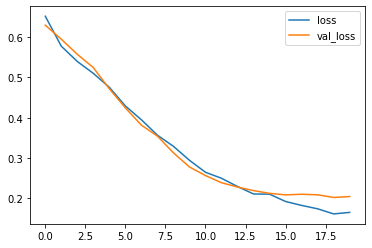

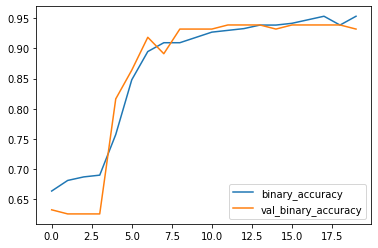

In [64]:
display_hist(history)  

In [65]:
y_pred = model.predict(X_test) > 0.5

print_results(y_test, y_pred)



Matriz de Confusão: 
 [[127   4]
 [  6  73]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       131
           1       0.95      0.92      0.94        79

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

Acuracidade:  0.9523809523809523


# Basic 1

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
class MyModel(Model):
    
    def __init__(self, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.dense1 = Dense(8, activation='sigmoid',input_shape=[9])
        self.dense2 = Dense(1, activation='sigmoid')        
        
    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

neural_net = MyModel(name='MyModel')

In [71]:
X_test = tf.Variable(X_test)
neural_net(X_test)[0:10]



<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.9767399 ],
       [0.00379056],
       [0.8561349 ],
       [0.00236672],
       [0.00390708],
       [0.00379056],
       [0.06180656],
       [0.00379056],
       [0.97126186],
       [0.5900558 ]], dtype=float32)>

In [67]:
neural_net.compile(
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


In [68]:
history = neural_net.fit(
    X_train, y_train,
    batch_size=1,
    validation_split=0.3,
    epochs=20,
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/20
342/342 [==============================] - 1s 2ms/step - loss: 0.5590 - binary_accuracy: 0.7135 - val_loss: 0.5430 - val_binary_accuracy: 0.6871
Epoch 2/20
342/342 [==============================] - 0s 1ms/step - loss: 0.4663 - binary_accuracy: 0.8012 - val_loss: 0.4856 - val_binary_accuracy: 0.7755
Epoch 3/20
342/342 [==============================] - 0s 1ms/step - loss: 0.4065 - binary_accuracy: 0.8480 - val_loss: 0.4273 - val_binary_accuracy: 0.8435
Epoch 4/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3483 - binary_accuracy: 0.8947 - val_loss: 0.3771 - val_binary_accuracy: 0.8707
Epoch 5/20
342/342 [==============================] - 0s 1ms/step - loss: 0.3010 - binary_accuracy: 0.9240 - val_loss: 0.3297 - val_binary_accuracy: 0.8980
Epoch 6/20
342/342 [==============================] - 0s 1ms/step - loss: 0.2580 - binary_accuracy: 0.9415 - val_loss: 0.3013 - val_binary_accuracy: 0.9048
Epoch 7/20
342/342 [==============================] - 0s 1ms/ste

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.558964,0.713450,0.543041,0.687075
1,0.466293,0.801170,0.485624,0.775510
2,0.406545,0.847953,0.427273,0.843537
3,0.348263,0.894737,0.377120,0.870748
4,0.301009,0.923977,0.329724,0.897959


Best Validation Loss: 0.2323
Best Validation Accuracy: 0.9320


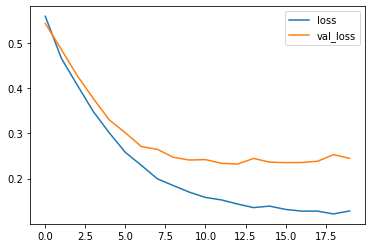

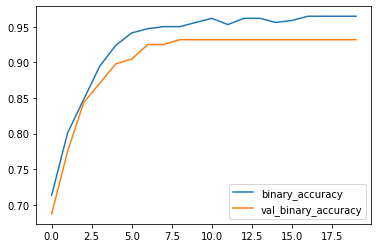

In [69]:
display_hist(history)  

In [70]:
y_pred = model.predict(X_test) > 0.5

print_results(y_test, y_pred)



Matriz de Confusão: 
 [[127   4]
 [  6  73]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       131
           1       0.95      0.92      0.94        79

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

Acuracidade:  0.9523809523809523


# Outras funções

In [72]:
# Training parameters.
learning_rate = 0.001
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [73]:
loss_fn = keras.losses.binary_crossentropy 

def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = loss_fn(y, pred) 
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(neural_net.trainable_weights)

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [74]:
training_steps = 100
batch_size = 1
display_step = 10

# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.repeat().batch(batch_size)

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = loss_fn(batch_y, pred)
        print("step: %i, loss: %f" % (step, loss))

step: 10, loss: 0.034969
step: 20, loss: 0.029915
step: 30, loss: 0.028553
step: 40, loss: 0.023263
step: 50, loss: 0.060015
step: 60, loss: 0.003770
step: 70, loss: 5.555499
step: 80, loss: 0.032103
step: 90, loss: 0.003891
step: 100, loss: 0.032326


In [75]:
y_pred =  neural_net(X_test) > 0.5

print_results(y_test, y_pred)


Matriz de Confusão: 
 [[126   5]
 [  8  71]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       131
           1       0.93      0.90      0.92        79

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210

Acuracidade:  0.9380952380952381


# Better model

In [76]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [77]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    batch_size=16,
    validation_split=0.5,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 0.1711 - binary_accuracy: 0.9426 - val_loss: 0.1678 - val_binary_accuracy: 0.9510
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1651 - binary_accuracy: 0.9467 - val_loss: 0.1691 - val_binary_accuracy: 0.9551
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1628 - binary_accuracy: 0.9467 - val_loss: 0.1692 - val_binary_accuracy: 0.9469
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1615 - binary_accuracy: 0.9508 - val_loss: 0.1695 - val_binary_accuracy: 0.9469
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1592 - binary_accuracy: 0.9549 - val_loss: 0.1682 - val_binary_accuracy: 0.9469
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1585 - binary_accuracy: 0.9549 - val_loss: 0.1680 - val_binary_accuracy: 0.9469
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - lo

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.171117,0.942623,0.167821,0.951020
1,0.165104,0.946721,0.169110,0.955102
2,0.162833,0.946721,0.169159,0.946939
3,0.161525,0.950820,0.169467,0.946939
4,0.159178,0.954918,0.168242,0.946939


Best Validation Loss: 0.1265
Best Validation Accuracy: 0.9592


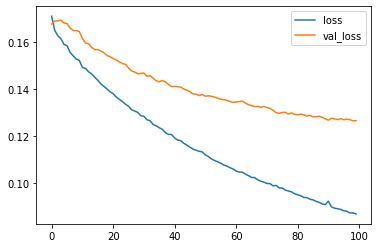

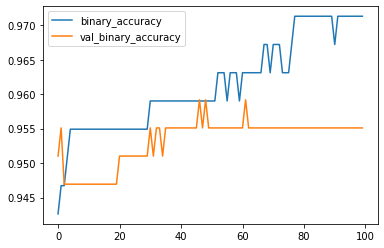

In [78]:
display_hist(history)  

In [82]:
y_pred = model.predict(tf.constant(X_test)) > 0.5

print_results(y_test, y_pred)



Matriz de Confusão: 
 [[128   3]
 [  4  75]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       131
           1       0.96      0.95      0.96        79

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

Acuracidade:  0.9666666666666667


# Explorando os dados


In [ ]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

In [ ]:
fraud = pd.read_csv("http://meusite.mackenzie.br/rogerio/ML/qconlondon2016_sample_data.csv")
fraud.drop(columns=['charge_time'],inplace=True) # por simplicidade excluímos esse dado do treinamento
                     
print(fraud.head())
print(fraud.shape) 



# Preparando os dados `X` e `y`

A preparação dos dados pode ser bastante complexa. Aqui ela envolve o **hot encode** dos atributos não numéricos, o rescaling dos dados e ainda a formatação dos dados para os padrões do **TensorFlow/Keras** (formato de matrizes e não dataframes).

## Hot Encode

In [ ]:
X = fraud.drop(columns=['fraudulent'])
    
X_number = X.select_dtypes(include='number')
X_categorical = X.select_dtypes(exclude='number')
    
dummies = [pd.get_dummies(X[c],prefix=c, prefix_sep='_') for c in X_categorical.columns]
X_dummies = pd.concat(dummies, axis=1)

X = pd.concat([X_number,X_dummies], axis=1)
X.head()

## Normalize

### Scale

In [ ]:
from sklearn.preprocessing import scale
X_norm = scale(X)
X_norm


### API StandardScaler

Prefira esse modo se você vai realmente implementar um `pipeline` de dados, *salvando* assim o `scaler` empregado.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm



# Preparando a saída `y` 

Valores numéricos para a saída de rede.

In [ ]:
fraud.fraudulent = fraud.fraudulent.replace(True,1)
fraud.fraudulent = fraud.fraudulent.replace(False,0)

y_num = fraud.fraudulent
y_num

## Separando os dados de Treinamento e Teste

In [ ]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_num, test_size=0.3, stratify=y_num, random_state=seed)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
y_train

# Adequando os dados para o `Keras`

Os dados para o `Keras` (TensorFlow) devem ser matrizes, com a saída em formato de um matriz binária (*hot encoded*).

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train


# Configuração da Rede DeepLearning

Nossa rede será uma rede neural sequencial MLP. Há 5 neurônios de entrada, correspondendo a cada atributo de entrada, vamos criar duas camadas ocultas de 8 neurônios, e uma camada de saída com 2 neurônios correspondendo às duas classes de saída.





In [ ]:
# Definição ou Configuração
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 

model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Treinamento da Rede DeepLearning

Os modelos neurais em geral trazem embutido no treinamento os conjuntos de validação. Assim, em geral, teremos um conjunto de *validação* e um conjunto de *teste*. O `history` permite salvar os dados do treinamento para análise do aprendizado, por exemplo *overfitting*. 

In [ ]:
# Treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

# Avaliação do Modelo

Em geral,  diferentemente do que é mais comum em outros modelos de classificação não neurais, avalia-se o erro em substituição à acurácia.

O Treinamento busca a cada etapa minimizar o erro (aumentar a acuracidade). Isso entretanto não ocorre de maneira regular. O Treinamento pode ser concluído quando alcança um erro médio desejado ou após um certo número de iterações, uma vez que o modelo pode não convergir.

In [ ]:
loss, val_loss, acc, val_acc = plot_loss_acc(history,'Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)')


# Predição, aplicando e avaliando o modelo

Podemos então aplicar e avaliar o modelo no conjunto de teste.

Em cada neurônio de saída a rede retorna a probabilidade da classe. A seleção do neurônio de maior valor a classe mais provável (`np.argmax()`).

In [ ]:
# Predict
print(model.predict(X_test))

y_pred = np.argmax(model.predict(X_test), axis=-1)
    
print(y_pred)
print(confusion_matrix(y_pred,y_test))


In [ ]:
print(classification_report(y_pred,y_test))

# Código completo

Aqui o código completo em uma única célula.

In [ ]:
## imports

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

fraud = pd.read_csv("http://meusite.mackenzie.br/rogerio/ML/qconlondon2016_sample_data.csv")
fraud.drop(columns=['charge_time'],inplace=True) # por simplicidade excluímos esse dado do treinamento
                     
## Hot Encode

X = fraud.drop(columns=['fraudulent'])
    
X_number = X.select_dtypes(include='number')
X_categorical = X.select_dtypes(exclude='number')
    
dummies = [pd.get_dummies(X[c],prefix=c, prefix_sep='_') for c in X_categorical.columns]
X_dummies = pd.concat(dummies, axis=1)

X = pd.concat([X_number,X_dummies], axis=1)
X.head()

## Normalize

from sklearn.preprocessing import scale
X_norm = scale(X)
X_norm

## Preparando a saída `y` 

fraud.fraudulent = fraud.fraudulent.replace(True,1)
fraud.fraudulent = fraud.fraudulent.replace(False,0)

y_num = fraud.fraudulent
y_num

## Separando os dados de Treinamento e Teste 

seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_num, test_size=0.3, stratify=y_num, random_state=seed)

## Adequando categorical(y_train) para o `Keras`

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train

## Configuração da Rede DeepLearning

model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 

model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Treinamento da Rede DeepLearning

history = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

## Avaliação do Treinamento

loss, val_loss, acc, val_acc = plot_loss_acc(history,'Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)')

## Predição, aplicando e avaliando o modelo

y_pred = np.argmax(model.predict(X_test), axis=-1)
    
print(y_pred)
print(confusion_matrix(y_pred,y_test))

print(classification_report(y_pred,y_test))

# Exercício. 
Execute o modelo acima sem normalização dos dados. O modelo é sensível a normalização? 

# Exercício. 
Execute o modelo agora empregando *label encode* do atributo `card_country`.

# Exercício. 
Agora varie parâmetros da rede neural, como número de camadas, número de neurônios e função de ativação. Veja se consegue obter um resultado significativamente melhor que os anteriores.

# Exercício. 
Empregue os modelos acima e refaça o treinamento dos dados de fraude incluindo agora o dia e o mês das operações.

## **LAB SET UP**
Execute antes de iniciar o Lab.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

print('Set Up completed!')    

# Síntese

Você viu bastante coisa nesta trilha! Mas muitos dos recursos que você viu aqui você acabará utilizando muitas vezes de forma transparente. Na maior parte do tempo você poderá fazer operações como `x = x * y + 1`, sem se preocupar que são tensores, se estão executando na GPU ou não, que operação está salvando os gradientes desse cálculo ou mesmo que há um grafo de execução associado a ela.

Os recursos vistos aqui como Tensores, uso de GPU para o processamento, cálculo automático de gradiente e o uso de grafos de execução, são essencias e em grande parte são eles que viabilizam a criação, treinamento e execução de modelos de deep learning com milhares de elementos e dados. 

Esses recursos são bastante dependentes da implementação. Aqui analisamos esses recurso com algum detalhe para o `TensorFlow` e a implementação, os comandos e uso em outros frameworks como o `Pytorch` podem diferir bastante. Mas os conceitos são os mesmos que na parte mais essencial e prática, de tratamento de tensores, a diferença é mínima sendo todos muito próximos de como o `Python` e o `Numpy` lidam com coleções.  

## Para saber mais

Acesse o site do `https://www.tensorflow.org/guide` e explore as **Noções Básicas do TensorFlow**, incluindo tensores, a diferenciação automática. E você pode aproveitar e entender também o que é um tensor esparso.  

Acesse o site do `https://www.tensorflow.org/guide` e explore os **Aceleradores**. O que seria uma TPU? 

Assista ao vídeo **TensorFlow Eager Mode**, https://youtu.be/qTYQEXsBb_E para entender melhor o que é um grafo de execução. 

Acesse o tutorial do `PyTorch`, **Tensors** em https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html e veja as diferenças de empregar tensores com o `TensorFlow`. 



## Referências

1. Aston Zhang and Zachary C. Lipton and Mu Li and Alexander J. Smola. **Dive into Deep Learning** (2020). Disponível em: https://d2l.ai/index.html Acesso em: 21 de abril de 2021. 

1. ___. **Noções Básicas do TensorFlow**. Disponível em: https://www.tensorflow.org/guide Acesso em: 28 de maio de 2021.

1. ___. **Aceleradores**. Disponível em: https://www.tensorflow.org/guide Acesso em: 28 de maio de 2021.

1. ___. **Tensors**. Disponível em: https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html  Acesso em: 28 de maio de 2021.

1. Géron, A. **Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems**, 2nd ed. (2019) O'Reilly 

1. Nikhil Buduma. **Fundamentals of Deep Learning**, O'Reilly Media, Inc., (2017) ISBN: 9781491925614

1. Ramsundar, B., Zadeh, R. B. **TensorFlow for Deep Learning** (2016)
, O'Reilly Media, Inc. 

1. Chollet, F. **Deep Learning with Python**. (2018) Manning Publications Co. 